## Homework 4 : Solutions - Bhagyashri Patil

Q.1) Find all the word types which occur at least 250 times in the Brown corpus but do not occur at all in *Moby Dick*. For this problem, you should normalize both corpora by removing all punctuation and folding everything to lower case.

**Importing NLTK:**

In [ ]:
import nltk
nltk.download('book', quiet=True)
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


**Normalizing both corpora:**

In [ ]:
moby=[w.lower() for w in text1 if w.isalpha()]

In [ ]:
brownfreq=nltk.FreqDist([w.lower() for w in nltk.corpus.brown.words() if w.isalpha()])

**Word types present >= 250 times in Brown corpus but NOT in Moby Dick:**

In [ ]:
wordcount=[w for w in brownfreq if brownfreq[w]>249 and w not in moby]

In [ ]:
print(wordcount)

['program', 'toward', 'members', 'af']


In [ ]:
len(wordcount)

4

**Answer:** There are a total of **4 word types** which occur at least 250 times in the Brown corpus but do not occur at all in Moby Dick.



---



Q.2) Find the word(s) in `nltk.corpus.words.words()` with the longest sequence of consonants. For example, *strengths* has 5 consonants in a row: *n, g, t, h, s*. Are there any longer sequences? For the purposes of this question, you should consider *y* to be a vowel.

**Importing Regular Expressions:**

In [ ]:
import re

**Importing Words Corpus:**

In [ ]:
wordlist = list(iter(nltk.corpus.words.words()))

**Generating Words with longest sequence of Consonants having count of consonants = 5:**

In [ ]:
[w for w in wordlist if re.search(r'[bcdfghjklmnpqrstvwxz]{5,}', w)]

['altschin',
 'Anchtherium',
 'Angstrom',
 'angstrom',
 'archchampion',
 'archchaplain',
 'archcharlatan',
 'archcheater',
 'archchemic',
 'archchief',
 'archchronicler',
 'archcriminal',
 'archcritic',
 'archcrown',
 'archdruid',
 'archflamen',
 'archflatterer',
 'archfriend',
 'archknave',
 'archphilosopher',
 'archphylarch',
 'archplagiarist',
 'archplagiary',
 'archplayer',
 'archplotter',
 'archplunderer',
 'archplutocrat',
 'archpractice',
 'archprelate',
 'archprelatic',
 'archprelatical',
 'archpresbyter',
 'archpresbyterate',
 'archpresbytery',
 'archpretender',
 'archpriest',
 'archpriesthood',
 'archpriestship',
 'archprimate',
 'archprince',
 'archprophet',
 'archprotopope',
 'archprototype',
 'archscoundrel',
 'archshepherd',
 'archsnob',
 'archspirit',
 'archspy',
 'archsteward',
 'archswindler',
 'archthief',
 'archtraitor',
 'archtreasurer',
 'archtreasurership',
 'ashthroat',
 'backscraper',
 'backspread',
 'backspringing',
 'backstrap',
 'backstretch',
 'backstring',


In [ ]:
len([w for w in wordlist if re.search(r'[bcdfghjklmnpqrstvwxz]{5,}', w)])

270

There are a total of **270 words** in the Words corpus, which have **Consonants sequence as 5**.

**Generating Words with longest sequence of Consonants having count of consonants = 6:**

In [ ]:
[w for w in wordlist if re.search(r'[bcdfghjklmnpqrstvwxz]{6,}', w)]

['archchronicler',
 'bergschrund',
 'Eschscholtzia',
 'fruchtschiefer',
 'latchstring',
 'lengthsman',
 'Nachschlag',
 'postphthisic',
 'veldtschoen']

In [ ]:
len([w for w in wordlist if re.search(r'[bcdfghjklmnpqrstvwxz]{6,}', w)])

9

There are a total of **9 words** in the Words corpus, which have **Consonants sequence as 6**

**Generating Words with longest sequence of Consonants having count of consonants = 7:**

In [ ]:
[w for w in wordlist if re.search(r'[bcdfghjklmnpqrstvwxz]{7,}', w)]

[]

There are a total of **0 words** in the Words corpus, which have **Consonants sequence as 7**

**Answer:**

1) Here, we get no words for condition where longest sequence of consonants is 7.

2) Since we get no output for 7, the **Longest sequence of Consonants** we get are the words having **longest sequence as 6**. 



---



Q.3) Compute the mean standardized type/token ratio (MSTTR) for each of the text categories in the Brown corpus (i.e., adventure, government, etc.). Use a partition size of 1,000 tokens, and normalize the text by removing both punctuation and case. Are the results surprising or about what you would expect? (Hints: see pg. 58 in the Brezina book).

**Importing Brown Corpus:**

In [ ]:
from nltk.corpus import brown
from nltk import word_tokenize
from toolz import *

**Brown Corpus Categories:**

In [ ]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

**Normalizing the Brown Corpus:**

In [ ]:
def normalize(toks):
  return [w.lower() for w in toks if w.isalpha()]

**Type/Token Ratio of the Brown Corpus:**

In [ ]:
def ttr(toks):
  return len(set(toks)) / len(toks)

**Mean Segmental Type/Token Ratio (MSTTR) of the Brown Corpus:**

In [ ]:
def msttr(toks, k=1000):
  ttrs = [ttr(chunk) for chunk in partition(k,toks)]
  return sum(ttrs) / len(ttrs)

**Displaying the Results:**

In [ ]:
for text in brown.categories():
  toks = normalize(nltk.corpus.brown.words(categories=text))
  print(f'{text:23} {msttr(toks):5.3}')

adventure               0.442
belles_lettres          0.453
editorial               0.471
fiction                 0.446
government              0.379
hobbies                 0.436
humor                   0.473
learned                 0.398
lore                    0.451
mystery                 0.426
news                    0.468
religion                0.419
reviews                   0.5
romance                 0.428
science_fiction         0.452




---



Q.4) Use the Flesch-Kinkaid Readability Level test measure the difficulty of each of the inaugural addresses in `nltk.corpus.inaugural`, and produce a line graph plotting readability by year. The formula for FKRL is:

$$\mathit{FK}=0.39\times\frac{\textrm{# of words}}{\textrm{# of sents}}+11.8\times\frac{\textrm{# of syllables}}{\textrm{# of words}}-15.59$$

**Importing CMU Dictionary:**

In [ ]:
cmudict = nltk.corpus.cmudict.dict()

**Defining Stress and Syllables Functions:**

In [ ]:
def stress(pron):
  return [char for phone in pron for char in phone if char.isdigit()]

def w_syllables(word):
  if word in cmudict:
    return len([p for p in cmudict[word][0] if p[-1].isdigit()])
  else:
    return len(re.findall(r'[aeiou]+', word))

**Importing Inaugural corpus:**

In [ ]:
from nltk.corpus import inaugural

**Calculating the Flesch-Kinkaid Readability Level Test:**

In [ ]:
year_values = []
fk_values = []

for i in inaugural.fileids():
  num_words = len([w for w in inaugural.words(i) if w.isalpha()])
  num_sents = len(inaugural.sents(i))
  num_syllables = sum([w_syllables(w) for w in inaugural.words(i) if w.isalpha()])
  
  fk_score = (0.39 * (num_words/num_sents)) + (11.8 * (num_syllables/num_words)) - 15.59
  
  print(f'{i:25} {i[:4]:10} {fk_score:6.2f}')
  
  fk_values.append(fk_score) 
  year_values.append(i[:4])

1789-Washington.txt       1789        27.08
1793-Washington.txt       1793        16.54
1797-Adams.txt            1797        28.56
1801-Jefferson.txt        1801        18.72
1805-Jefferson.txt        1805        21.76
1809-Madison.txt          1809        25.29
1813-Madison.txt          1813        17.84
1817-Monroe.txt           1817        14.07
1821-Monroe.txt           1821        16.49
1825-Adams.txt            1825        19.56
1829-Jackson.txt          1829        21.63
1833-Jackson.txt          1833        19.19
1837-VanBuren.txt         1837        20.06
1841-Harrison.txt         1841        19.14
1845-Polk.txt             1845        16.17
1849-Taylor.txt           1849        23.35
1853-Pierce.txt           1853        16.18
1857-Buchanan.txt         1857        15.92
1861-Lincoln.txt          1861        13.11
1865-Lincoln.txt          1865        11.18
1869-Grant.txt            1869        13.35
1873-Grant.txt            1873        14.41
1877-Hayes.txt            1877  

**Plotting the graph of Flesch-Kinkaid Readability Level by Year:**

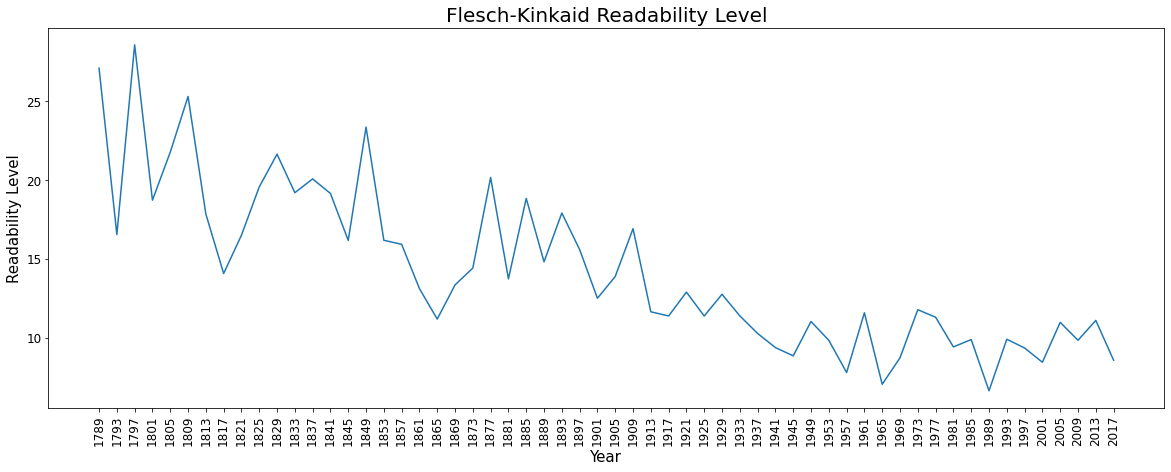

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,7))
plt.plot(year_values, fk_values)

plt.xlabel("Year", fontsize = 15)
plt.xticks(rotation = 90)
plt.tick_params(axis='x', which='major', labelsize = 12)

plt.ylabel("Readability Level", fontsize = 15)
plt.tick_params(axis='y', which='major', labelsize = 12)

plt.title("Flesch-Kinkaid Readability Level", fontsize = 20)
plt.show()

**Description:**

1) The Flesch-Kincaid Readability Level tests are readability tests designed to indicate how difficult a passage in English is to understand.

2) In the Flesch-Kinkaid Readability Level test, the higher the score is, the more easier it is to read and understand.

3) As the score decreases, the more difficult it gets to read and understand the text.


---



Source Credits : [https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests](https://)



---

